In [1]:
from matplotlib import pyplot as plt

In [2]:
from matplotlib.image import imread
from os import listdir 
from numpy import asarray
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array


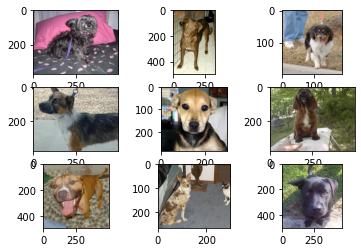

In [3]:
folder = 'train/'
for i in range(9):
    plt.subplot(330+1+i)
    filename = folder+'dog.'+str(i)+'.jpg'
    image=imread(filename)
    plt.imshow(image)
plt.show()

In [3]:
from os import makedirs
from shutil import copyfile
from random import random
from random import seed

In [4]:
import sys
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import TensorBoard as tb
    

In [14]:
ih,iw=200,200
train_dir = 'train/'
validation_dir='validation/'


epoch = 25
batchsize = 28
train_sample = 5000
validation_sample = 500

train_datagen=ImageDataGenerator(rescale=1.0/255.0,width_shift_range=0.1,height_shift_range=0.1,horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1.0/255.0)

train_it=train_datagen.flow_from_directory(train_dir,class_mode='binary',batch_size=batchsize,target_size=(200,200))
test_it=test_datagen.flow_from_directory(validation_dir,class_mode='binary',batch_size=batchsize,target_size=(200,200))


Found 20000 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.


In [43]:
test_it.class_indices
# test_batches.class_indices.keys()

{'cat': 0, 'dog': 1}

In [15]:
# model architecture
model = Sequential()
model.add(Conv2D(32,(3,3),activation='relu',kernel_initializer='he_uniform', padding='same',input_shape=(200,200,3)))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64,(3,3),activation='relu',kernel_initializer='he_uniform'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(128,(3,3),activation='relu',kernel_initializer='he_uniform'))
model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dense(128,activation='relu',kernel_initializer='he_uniform'))
model.add(Dense(1,activation='sigmoid'))




Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 200, 200, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 100, 100, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 98, 98, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 49, 49, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 47, 47, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 23, 23, 128)       0         
_________________________________________________________________
flatten (Flatten)            (None, 67712)             0

In [ ]:
#Optimizer and compilation
opt=SGD(learning_rate=0.001,momentum=0.9)
model.compile(optimizer=opt, loss='binary_crossentropy',metrics=['accuracy'])
model.summary()

In [ ]:
history = model.fit_generator(train_it,steps_per_epoch=train_sample // batchsize,
                              validation_data=test_it,validation_steps=validation_sample // batchsize,
                              epochs=epoch)

In [ ]:
model.save('final_model.h5')

In [2]:
ls

 Volume in drive D is New Volume
 Volume Serial Number is F212-6C49

 Directory of D:\Image_Classification\cat_v_dog

05-12-2020  16:20    <DIR>          .
05-12-2020  16:20    <DIR>          ..
05-12-2020  15:31    <DIR>          .ipynb_checkpoints
05-12-2020  16:20           261,749 Cat_v_Dog.ipynb
05-12-2020  14:48        70,131,024 final_model.h5
05-12-2020  15:39             2,992 Predict.ipynb
05-12-2020  10:18    <DIR>          train
05-12-2020  10:18    <DIR>          validation
               3 File(s)     70,395,765 bytes
               5 Dir(s)  155,059,933,184 bytes free


In [3]:
from tensorflow.keras.models import load_model
model = load_model('final_model.h5')
model

ModuleNotFoundError: No module named 'tensorflow'

In [18]:
import numpy as np

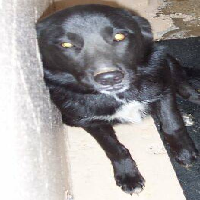

In [50]:
img_pred = load_img('validation/dog/dog.10000.jpg',target_size=(200,200))

# if result[0][0]==1:

#     prediction = "dog"
# else:
#     prediction = "cat"
img_pred
# print(prediction)

In [51]:
img_pred = img_to_array(img_pred)
img_pred.shape
img_pred = np.expand_dims(img_pred,axis=0)

result = model.predict(img_pred)
print(result)

[[1.]]


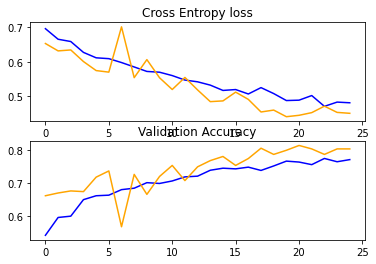

In [30]:

plt.subplot(211)
plt.title('Cross Entropy loss')
plt.plot(history.history['loss'],color='blue',label='train')
plt.plot(history.history['val_loss'],color='orange',label='test')

plt.subplot(212)    
plt.title('Validation Accuracy')
plt.plot(history.history['accuracy'],co
lor='blue',label='train')
plt.plot(history.history['val_accuracy'],color='orange',label='test')
# filename=sys.argv[0].split('/')[-1]
# plt.savefig(filname+'_plot.png')
# plt.close()